In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from matplotlib.legend_handler import HandlerLine2D


In [144]:
def parametros(modelo): 
    y_pred_rf = modelo.predict(X_test_data)
    cm_rf = confusion_matrix(y_test_data,y_pred_rf)
    print('Confusion Matrix : \n', cm_rf)

    total1=sum(sum(cm_rf))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm_rf[0,0]+cm_rf[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
    print('Specificity : ', specificity1)

In [145]:
os.chdir(r'C:\Users\ASUS\Desktop\GitHub\Machine_Learning_empleados')
df_empleados=pd.read_excel('df_empleados.xlsx')
df_retiros=pd.read_excel('df_retiros.xlsx')
df_empleados.columns
df_empleados.head()


,Fecha,Codigo empresa,ID Genero,ID Estado civil,Fecha nacimiento,Codigo localidad,Tipo nomina,Fecha ingreso,Fecha inicio contrato,ID Cargo,...,Clase empleado,Clase nomina,Subsidio transporte,Porcentaje riesgo,Salario,Compensación variable,Porcent comp variable,Total salario,Cedula_anonimizada,Ubicacion_anonimizada
0,2017-12-31,21,M,ND,1972-04-03,NaN,NaN,1995-07-10,1995-07-10,NaN,...,NaN,NaN,NaN,NaN,1187500.0,0.0,0,1187500.0,1531,7
1,2017-12-31,21,M,ND,1992-02-20,NaN,NaN,2015-01-05,2015-01-05,NaN,...,NaN,NaN,NaN,NaN,1002800.0,0.0,0,1002800.0,442,7
2,2017-12-31,21,M,ND,1985-10-13,NaN,NaN,2015-08-19,2015-08-19,NaN,...,NaN,NaN,NaN,NaN,1612200.0,0.0,0,1612200.0,1644,2
3,2017-12-31,21,M,ND,1900-01-02,NaN,NaN,1977-03-01,1977-03-01,NaN,...,NaN,NaN,NaN,NaN,720978.0,0.0,0,720978.0,1942,5
4,2017-12-31,21,M,ND,1932-02-09,NaN,NaN,1987-04-01,1987-04-01,NaN,...,NaN,NaN,NaN,NaN,155682.0,0.0,0,155682.0,1914,5


In [146]:
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["0"], "ND")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["NO DEFINIDO"], "ND")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["CASADO"], "CAS")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["DIVORCIADO"], "DIV")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["SEPARADO"], "SEP")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["SOLTERO"], "SOL")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["UNION LIBRE"], "UNI")
df_empleados['ID Estado civil'] = df_empleados['ID Estado civil'].replace(["VIUDO"], "VIU")


In [147]:
df_empleados['ano_nacimiento'] = df_empleados['Fecha nacimiento'].dt.year 
df_empleados['ano_ingreso'] = df_empleados['Fecha ingreso'].dt.year 
df_retiros['ano_fin_contrato'] = df_retiros['FECHA FIN CONTRATO'].dt.year 

In [148]:
datos_join1=pd.merge(df_empleados,df_retiros,on='Cedula_anonimizada',how='left')
datos_join1.head()

,Fecha,Codigo empresa,ID Genero,ID Estado civil,Fecha nacimiento,Codigo localidad,Tipo nomina,Fecha ingreso,Fecha inicio contrato,ID Cargo,...,Total salario,Cedula_anonimizada,Ubicacion_anonimizada,ano_nacimiento,ano_ingreso,FECHA FIN CONTRATO,CAUSA NOMBRE,TIPO DE RETIRO,retiro,ano_fin_contrato
0,2017-12-31,21,M,ND,1972-04-03,NaN,NaN,1995-07-10,1995-07-10,NaN,...,1187500.0,1531,7,1972.0,1995.0,NaT,NaN,NaN,NaN,NaN
1,2017-12-31,21,M,ND,1992-02-20,NaN,NaN,2015-01-05,2015-01-05,NaN,...,1002800.0,442,7,1992.0,2015.0,NaT,NaN,NaN,NaN,NaN
2,2017-12-31,21,M,ND,1985-10-13,NaN,NaN,2015-08-19,2015-08-19,NaN,...,1612200.0,1644,2,1985.0,2015.0,NaT,NaN,NaN,NaN,NaN
3,2017-12-31,21,M,ND,1900-01-02,NaN,NaN,1977-03-01,1977-03-01,NaN,...,720978.0,1942,5,1900.0,1977.0,2020-07-03,FALLECIMIENTO,No Deseada,1.0,2020.0
4,2017-12-31,21,M,ND,1932-02-09,NaN,NaN,1987-04-01,1987-04-01,NaN,...,155682.0,1914,5,1932.0,1987.0,NaT,NaN,NaN,NaN,NaN


In [149]:
datos_join1.columns 

Index(['Fecha', 'Codigo empresa', 'ID Genero', 'ID Estado civil',
       'Fecha nacimiento', 'Codigo localidad', 'Tipo nomina', 'Fecha ingreso',
       'Fecha inicio contrato', 'ID Cargo', 'Tipo cargo', 'Nivel cargo',
       'Categoria cargo', 'Tipo area', 'ID Centro costo',
       'Señal sindicalizado', 'Clase empleado', 'Clase nomina',
       'Subsidio transporte', 'Porcentaje riesgo', 'Salario',
       'Compensación variable', 'Porcent comp variable', 'Total salario',
       'Cedula_anonimizada', 'Ubicacion_anonimizada', 'ano_nacimiento',
       'ano_ingreso', 'FECHA FIN CONTRATO', 'CAUSA NOMBRE', 'TIPO DE RETIRO',
       'retiro', 'ano_fin_contrato'],
      dtype='object')

In [150]:
datos_join1["retiro"].fillna(0, inplace = True) 
datos_join1["ano_fin_contrato"].fillna(2020, inplace = True) 
datos_join1["Total salario_min"]=datos_join1['Total salario']
datos_join1["Total salario_max"]=datos_join1['Total salario']

In [151]:
datos_join1['ID Genero'] = datos_join1['ID Genero'].map(str)
datos_join1['Tipo cargo'] = datos_join1['Tipo cargo'].map(str)
datos_join1['Nivel cargo'] = datos_join1['Nivel cargo'].map(str)
datos_join1['Tipo area'] = datos_join1['Tipo area'].map(str)
datos_join1['ID Estado civil'] = datos_join1['ID Estado civil'].map(str)

datos_join1['retiro'] = datos_join1['retiro'].replace([0], "0")
datos_join1['retiro'] = datos_join1['retiro'].replace([1], "1")
datos_join1['retiro'].astype(int)

0        0
1        0
2        0
3        1
4        0
        ..
40859    0
40860    0
40861    0
40862    0
40863    0
Name: retiro, Length: 40864, dtype: int32

In [152]:
data_agrupada=datos_join1.groupby(['Cedula_anonimizada'], as_index = False).agg({'Fecha':'max',
                                                                   'CAUSA NOMBRE':'max',
                                                                   'TIPO DE RETIRO':'max',
                                                                   'FECHA FIN CONTRATO':'max',
                                                                   'retiro':'max',
                                                                   'ID Genero':'max',
                                                                   'ID Estado civil':'max',
                                                                   'Tipo cargo':'max',
                                                                   'Nivel cargo':'max',
                                                                   'Tipo area':'max',
                                                                   'Total salario_min':'min',
                                                                   'Total salario_max':'max',
                                                                   'ano_nacimiento':'max',
                                                                   'ano_ingreso':'max',
                                                                   'ano_fin_contrato':'max',
                                                                   'Tipo area':'count'
                                                                  })
data_agrupada.head()

,Cedula_anonimizada,Fecha,CAUSA NOMBRE,TIPO DE RETIRO,FECHA FIN CONTRATO,retiro,ID Genero,ID Estado civil,Tipo cargo,Nivel cargo,Tipo area,Total salario_min,Total salario_max,ano_nacimiento,ano_ingreso,ano_fin_contrato
0,1,2020-08-31,RETIRO VOLUNTARIO,No Deseada,2020-08-31,1,M,SOL,BECARIOS / APRENDICES / PASANTES,7.0,4,438902.0,877803.0,1999.0,2020.0,2020.0
1,2,2020-12-31,VENCIMIENTO DE CONTRATO,NO APLICA,2020-01-22,1,nan,SOL,BECARIOS / APRENDICES / PASANTES,7.0,7,828116.0,828116.0,2000.0,2019.0,2020.0
2,3,2020-12-31,VENCIMIENTO DE CONTRATO,NO APLICA,2019-12-16,1,nan,SOL,BECARIOS / APRENDICES / PASANTES,7.0,7,828116.0,828116.0,2001.0,2019.0,2019.0
3,4,2020-08-31,NaN,NaN,NaT,0,F,nan,nan,7.0,7,0.0,877803.0,2000.0,2020.0,2020.0
4,5,2020-08-31,VENCIMIENTO DE CONTRATO,No Deseada,2020-08-02,1,F,nan,nan,7.0,7,0.0,1540700.0,2000.0,2020.0,2020.0


In [153]:
datos_join1["ano_fin_contrato"].fillna(2020, inplace = True) 
data_agrupada['anos_trabajados']=data_agrupada['ano_fin_contrato'] - data_agrupada['ano_ingreso']
data_agrupada['anos_ingreso']=data_agrupada['ano_ingreso'] - data_agrupada['ano_nacimiento']
data_agrupada['dif_salario']=data_agrupada['Total salario_max'] - data_agrupada['Total salario_min']

In [154]:
data_modelo=data_agrupada[['retiro',
                           'ID Genero',
                           'ID Estado civil',
                           'anos_trabajados',
                           'anos_ingreso',
                           'dif_salario',
                           'Tipo area',
                          # 'ano_fin_contrato',
                           'Total salario_max',
                           'Total salario_min',
                           #'Nivel cargo',
                           #'Tipo area'
                          ]]
#data_modelo['Nivel cargo'].fillna(0, inplace = True)
data_modelo['ID Genero'].fillna('ND', inplace = True)
data_modelo['ID Estado civil'].fillna('ND', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
data_modelo

,retiro,ID Genero,ID Estado civil,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
0,1,M,SOL,0.0,21.0,438901.0,4,877803.0,438902.0
1,1,nan,SOL,1.0,19.0,0.0,7,828116.0,828116.0
2,1,nan,SOL,0.0,18.0,0.0,7,828116.0,828116.0
3,0,F,nan,0.0,20.0,877803.0,7,877803.0,0.0
4,1,F,nan,0.0,20.0,1540700.0,7,1540700.0,0.0
...,...,...,...,...,...,...,...,...,...
1867,1,nan,ND,2.0,33.0,2430200.0,23,12500000.0,10069800.0
1868,0,nan,nan,16.0,30.0,11411439.0,34,11411439.0,0.0
1869,0,nan,nan,1.0,42.0,35394000.0,14,35394000.0,0.0
1870,0,F,SOL,3.0,18.0,43525.0,4,781242.0,737717.0


In [156]:
df_dummies_sexo=pd.get_dummies(data_modelo['ID Genero'])
df_dummies_Estado_civil=pd.get_dummies(data_modelo['ID Estado civil'])
data_modelo_2=pd.concat([df_dummies_sexo,df_dummies_Estado_civil,data_modelo], axis=1)
data_modelo_2=data_modelo_2.drop(columns='ID Genero').copy()
data_modelo_2=data_modelo_2.drop(columns='ID Estado civil').copy()
data_modelo_2

,F,M,nan,CAS,DIV,ND,SEP,SOL,UNI,VIU,nan,retiro,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
0,0,1,0,0,0,0,0,1,0,0,0,1,0.0,21.0,438901.0,4,877803.0,438902.0
1,0,0,1,0,0,0,0,1,0,0,0,1,1.0,19.0,0.0,7,828116.0,828116.0
2,0,0,1,0,0,0,0,1,0,0,0,1,0.0,18.0,0.0,7,828116.0,828116.0
3,1,0,0,0,0,0,0,0,0,0,1,0,0.0,20.0,877803.0,7,877803.0,0.0
4,1,0,0,0,0,0,0,0,0,0,1,1,0.0,20.0,1540700.0,7,1540700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,1,0,0,1,0,0,0,0,0,1,2.0,33.0,2430200.0,23,12500000.0,10069800.0
1868,0,0,1,0,0,0,0,0,0,0,1,0,16.0,30.0,11411439.0,34,11411439.0,0.0
1869,0,0,1,0,0,0,0,0,0,0,1,0,1.0,42.0,35394000.0,14,35394000.0,0.0
1870,1,0,0,0,0,0,0,1,0,0,0,0,3.0,18.0,43525.0,4,781242.0,737717.0


In [157]:
y=data_modelo_2['retiro']
X=data_modelo_2.drop(columns='retiro').copy()
data_modelo_2.head(200)

,F,M,nan,CAS,DIV,ND,SEP,SOL,UNI,VIU,nan,retiro,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
0,0,1,0,0,0,0,0,1,0,0,0,1,0.0,21.0,438901.0,4,877803.0,438902.0
1,0,0,1,0,0,0,0,1,0,0,0,1,1.0,19.0,0.0,7,828116.0,828116.0
2,0,0,1,0,0,0,0,1,0,0,0,1,0.0,18.0,0.0,7,828116.0,828116.0
3,1,0,0,0,0,0,0,0,0,0,1,0,0.0,20.0,877803.0,7,877803.0,0.0
4,1,0,0,0,0,0,0,0,0,0,1,1,0.0,20.0,1540700.0,7,1540700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,0,0,0,0,1,0,0,0,1,0.0,21.0,0.0,2,1090000.0,1090000.0
196,1,0,0,0,0,0,0,0,0,0,1,0,1.0,20.0,877803.0,10,877803.0,0.0
197,0,0,1,0,0,0,0,0,0,0,1,1,0.0,20.0,1755000.0,26,1755000.0,0.0
198,0,1,0,0,0,0,0,1,0,0,0,0,3.0,18.0,0.0,1,737717.0,737717.0


In [158]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data  = train_test_split(X,
                                                             y,
                                                            test_size=0.3, 
                                                            random_state=1234,
                                                            stratify=y
                                                            )

No handles with labels found to put in legend.


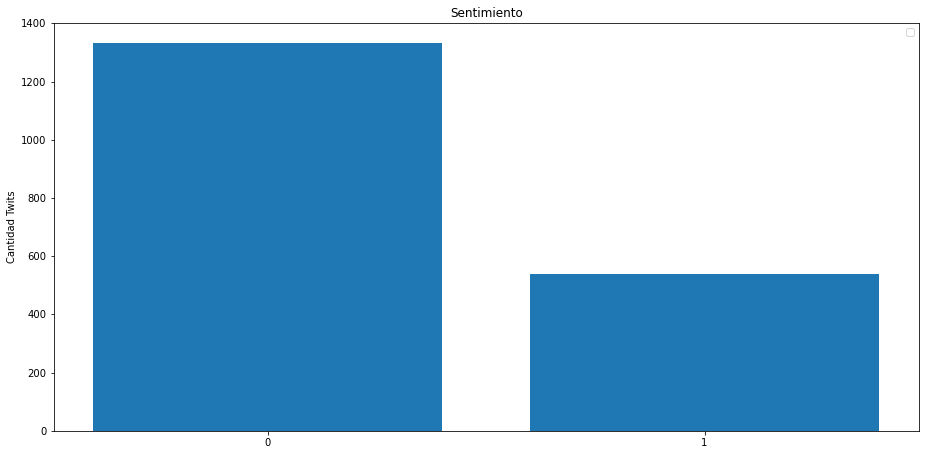

In [159]:
agrupacion_pais =data_modelo_2.groupby(['retiro'], as_index = False).count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["retiro"]
men_means =agrupacion_pais["anos_trabajados"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

# Refreciones

In [160]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs');
lr_model2 = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
lr_model.fit(X_train_data, y_train_data)
lr_model2.fit(X_train_data, y_train_data)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramDat

LogisticRegression(random_state=1, solver='newton-cg')

In [161]:
parametros(lr_model)

Confusion Matrix : 
 [[355  45]
 [ 41 121]]
Accuracy :  0.8469750889679716
Sensitivity :  0.8875
Specificity :  0.7469135802469136


In [162]:
parametros(lr_model2)

Confusion Matrix : 
 [[356  44]
 [ 50 112]]
Accuracy :  0.8327402135231317
Sensitivity :  0.89
Specificity :  0.691358024691358


# Arboles 
random forest 

In [163]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train_data, y_train_data)
rfc_pred = classifier.predict(X_test_data)
classifier.score(X_test_data, y_test_data)

0.9252669039145908

In [164]:
X_test_data

,F,M,nan,CAS,DIV,ND,SEP,SOL,UNI,VIU,nan,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
403,0,1,0,0,0,0,0,1,0,0,0,0.0,27.0,0.0,3,1195100.0,1195100.0
994,0,1,0,0,0,0,0,0,0,0,1,1.0,20.0,877803.0,9,877803.0,0.0
99,0,0,1,0,0,0,0,0,0,0,1,6.0,28.0,2632900.0,34,2632900.0,0.0
222,0,1,0,0,0,0,0,1,0,0,0,2.0,30.0,500000.0,15,4500000.0,4000000.0
1429,1,0,0,0,0,0,0,0,1,0,0,1.0,49.0,38700.0,11,1090000.0,1051300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0,0,1,0,0,0,0,1,0,0,0,2.0,23.0,1029500.0,25,3629500.0,2600000.0
437,1,0,0,0,0,0,0,0,0,0,1,1.0,23.0,3182200.0,11,3182200.0,0.0
836,0,0,1,0,0,0,0,0,0,0,1,3.0,23.0,1557537.0,34,1557537.0,0.0
1165,0,0,1,0,0,0,0,0,0,0,1,5.0,57.0,1195100.0,34,1195100.0,0.0


In [165]:
parametros(classifier)

Confusion Matrix : 
 [[378  22]
 [ 20 142]]
Accuracy :  0.9252669039145908
Sensitivity :  0.945
Specificity :  0.8765432098765432


In [166]:
model_rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 2,
                                  max_features = 8, random_state = 12345)
model_rf.fit(X_train_data, y_train_data)
rfc_pred = model_rf.predict(X_test_data)

In [167]:
parametros(model_rf)

Confusion Matrix : 
 [[382  18]
 [ 18 144]]
Accuracy :  0.9359430604982206
Sensitivity :  0.955
Specificity :  0.8888888888888888


# Algoritmo: K-vecinos más cercanos

In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [169]:
knn.fit(X_train_data, y_train_data)

KNeighborsClassifier(n_neighbors=6)

In [170]:
parametros(knn)

Confusion Matrix : 
 [[389  11]
 [ 38 124]]
Accuracy :  0.9128113879003559
Sensitivity :  0.9725
Specificity :  0.7654320987654321


# Kernel polinomial

In [171]:
from sklearn.svm import SVC

#poly_svm = SVC(kernel='poly', degree=3)
#poly_svm.fit(X_train_data, y_train_data);

In [172]:
#parametros(poly_svm)

# Redes neuronales

In [173]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=10, random_state=5)
clf.fit(X_train_data, y_train_data)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=10,
              random_state=5, solver='lbfgs')

In [174]:
parametros(clf)

Confusion Matrix : 
 [[352  48]
 [ 30 132]]
Accuracy :  0.8612099644128114
Sensitivity :  0.88
Specificity :  0.8148148148148148


In [175]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=25, random_state=10)
clf3.fit(X_train_data, y_train_data)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=25,
              random_state=10, solver='lbfgs')

In [176]:
parametros(clf3)

Confusion Matrix : 
 [[352  48]
 [ 30 132]]
Accuracy :  0.8612099644128114
Sensitivity :  0.88
Specificity :  0.8148148148148148


In [177]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=[25,10,12], random_state=10)
clf4.fit(X_train_data, y_train_data)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=[25, 10, 12],
              random_state=10, solver='lbfgs')

In [178]:
parametros(clf4)

Confusion Matrix : 
 [[352  48]
 [ 30 132]]
Accuracy :  0.8612099644128114
Sensitivity :  0.88
Specificity :  0.8148148148148148


In [179]:
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=[250,780,200], random_state=10)
clf5.fit(X_train_data, y_train_data)


MLPClassifier(activation='tanh', alpha=1e-05,
              hidden_layer_sizes=[250, 780, 200], random_state=10,
              solver='lbfgs')

In [180]:
parametros(clf5)

Confusion Matrix : 
 [[354  46]
 [ 33 129]]
Accuracy :  0.8594306049822064
Sensitivity :  0.885
Specificity :  0.7962962962962963


# Validación cruzada usando Scikit-Learn

# Estimando de una forma más robusta los hiperparámetros del modelo

Hasta el momento nos hemos concentrado en evaluar nuestros modelos en una partición de prueba. Sin embargo, es común introducir sobreajuste a través de la modificación manual de los hiperparámetros de un modelo conforme vamos reportando el error de generalización sobre el conjunto de prueba.

<img src="https://drive.google.com/uc?export=view&id=1brLudEu094L7H3-cFqnrIRZnDrFIfrNW">

En la anterior imagen, introducimos una nueva partición, conocida como partición de "**validación**". Esta partición es resultado de tomar la partición de entrenamiento y volver a dividirla (en entrenamiento y validación) de tal forma que cualquier configuración de parámetros que se use para entrenar un modelo, pueda ser reportada en **validación**. Una vez estemos seguros que tenemos el modelo con el mejor desempeño en **validación**, volvemos a unir ambas particiones, entrenamos un modelo sobre la partición original de entrenamiento y reportamos **una sola vez** en el conjunto de prueba.

In [181]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold


In [182]:
scores = cross_val_score(lr_model, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.74133333 0.81066667 0.84759358 0.90641711 0.95721925]
Accuracy promedio sobre los 5 pliegues: 0.8526459893048128


In [183]:
scores = cross_val_score(lr_model2, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramDat

Accuracy por cada pliegue: [0.72266667 0.784      0.82887701 0.84224599 0.91176471]
Accuracy promedio sobre los 5 pliegues: 0.8179108734402852


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramDat

In [184]:
scores = cross_val_score(classifier, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.90666667 0.93866667 0.93850267 0.9171123  0.94385027]
Accuracy promedio sobre los 5 pliegues: 0.928959714795009


In [185]:
scores = cross_val_score(model_rf, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.92266667 0.952      0.94117647 0.93315508 0.96524064]
Accuracy promedio sobre los 5 pliegues: 0.9428477718360071


In [186]:
scores = cross_val_score(knn, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.89066667 0.904      0.9197861  0.89304813 0.95721925]
Accuracy promedio sobre los 5 pliegues: 0.912944028520499


In [187]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.74666667 0.81333333 0.86898396 0.9144385  0.95721925]
Accuracy promedio sobre los 5 pliegues: 0.8601283422459893


In [188]:
scores = cross_val_score(clf3, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.74666667 0.81066667 0.83957219 0.87967914 0.9144385 ]
Accuracy promedio sobre los 5 pliegues: 0.8382046345811052


In [189]:
scores = cross_val_score(clf4, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.74666667 0.81066667 0.83957219 0.87967914 0.9144385 ]
Accuracy promedio sobre los 5 pliegues: 0.8382046345811052


In [190]:
scores = cross_val_score(clf5, X, y, cv=5)
print('Accuracy por cada pliegue: {}'.format(scores))
print('Accuracy promedio sobre los 5 pliegues: {}'.format(np.mean(scores)))

Accuracy por cada pliegue: [0.76266667 0.81333333 0.8342246  0.88235294 0.91176471]
Accuracy promedio sobre los 5 pliegues: 0.840868449197861


# Grid search

In [191]:
grid = [i for i in range(5, 10, 1)]
grid2 = [i for i in range(1, 4, 1)]
param_grid = {'n_estimators': [2**i for i in grid], 
              'min_samples_leaf': [2**i for i in grid2],
              'max_features': [2**i for i in grid2]}

In [192]:
print(param_grid['n_estimators'])

[32, 64, 128, 256, 512]


In [193]:
print(param_grid['min_samples_leaf'])

[2, 4, 8]


In [194]:
print(param_grid['max_features'])

[2, 4, 8]


In [195]:
param_grid

{'n_estimators': [32, 64, 128, 256, 512],
 'min_samples_leaf': [2, 4, 8],
 'max_features': [2, 4, 8]}

In [196]:
clf = GridSearchCV(RandomForestClassifier(random_state = 12345), param_grid=param_grid, verbose=2, return_train_score=True)
clf.fit(X_train_data, y_train_data)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] max_features=2, min_samples_leaf=2, n_estimators=32 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=32, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=2, min_samples_leaf=2, n_estimators=32 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=32, total=   0.1s
[CV] max_features=2, min_samples_leaf=2, n_estimators=32 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=32, total=   0.1s
[CV] max_features=2, min_samples_leaf=2, n_estimators=32 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=32, total=   0.1s
[CV] max_features=2, min_samples_leaf=2, n_estimators=32 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=32, total=   0.1s
[CV] max_features=2, min_samples_leaf=2, n_estimators=64 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=64, total=   1.0s
[CV] max_features=2, min_samples_leaf=2, n_estimators=64 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=64, total=   1.7s
[CV] max_features=2, min_samples_leaf=2, n_estimators=64 .............
[CV]  max_features=2, min_samples_leaf=2, n_estimators=64, total

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  3.2min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=12345),
             param_grid={'max_features': [2, 4, 8],
                         'min_samples_leaf': [2, 4, 8],
                         'n_estimators': [32, 64, 128, 256, 512]},
             return_train_score=True, verbose=2)

In [197]:
import pandas as pd
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114850,0.009566,0.009552,0.002842,2,2,32,"{'max_features': 2, 'min_samples_leaf': 2, 'n_...",0.912214,0.950382,...,0.935115,0.016012,23,0.967557,0.970420,0.972328,0.972328,0.973282,0.971183,0.002038
1,0.926955,0.561397,0.085818,0.057242,2,2,64,"{'max_features': 2, 'min_samples_leaf': 2, 'n_...",0.916031,0.954198,...,0.938168,0.015343,15,0.967557,0.969466,0.971374,0.970420,0.967557,0.969275,0.001527
2,0.450889,0.062688,0.022823,0.006079,2,2,128,"{'max_features': 2, 'min_samples_leaf': 2, 'n_...",0.912214,0.958015,...,0.939695,0.018289,11,0.968511,0.970420,0.971374,0.970420,0.967557,0.969656,0.001402
3,0.943871,0.109078,0.050385,0.009906,2,2,256,"{'max_features': 2, 'min_samples_leaf': 2, 'n_...",0.908397,0.954198,...,0.937405,0.018321,17,0.969466,0.969466,0.969466,0.970420,0.967557,0.969275,0.000935
4,1.725753,0.178183,0.105642,0.026768,2,2,512,"{'max_features': 2, 'min_samples_leaf': 2, 'n_...",0.904580,0.954198,...,0.936641,0.019552,19,0.968511,0.970420,0.971374,0.971374,0.971374,0.970611,0.001113
5,0.104715,0.018022,0.007284,0.004093,2,4,32,"{'max_features': 2, 'min_samples_leaf': 4, 'n_...",0.881679,0.942748,...,0.920611,0.022824,38,0.938931,0.942748,0.940840,0.943702,0.945611,0.942366,0.002306
6,0.209738,0.030222,0.015538,0.004888,2,4,64,"{'max_features': 2, 'min_samples_leaf': 4, 'n_...",0.877863,0.942748,...,0.922137,0.024688,35,0.937023,0.941794,0.938931,0.946565,0.946565,0.942176,0.003892
7,0.400566,0.036742,0.022322,0.004615,2,4,128,"{'max_features': 2, 'min_samples_leaf': 4, 'n_...",0.881679,0.942748,...,0.922901,0.022568,34,0.945611,0.943702,0.942748,0.951336,0.947519,0.946183,0.003053
8,0.792451,0.049674,0.047935,0.010214,2,4,256,"{'max_features': 2, 'min_samples_leaf': 4, 'n_...",0.881679,0.950382,...,0.923664,0.023652,33,0.944656,0.947519,0.947519,0.949427,0.943702,0.946565,0.002091
9,1.643223,0.043286,0.091229,0.015795,2,4,512,"{'max_features': 2, 'min_samples_leaf': 4, 'n_...",0.881679,0.946565,...,0.922137,0.022464,37,0.946565,0.948473,0.947519,0.948473,0.944656,0.947137,0.001428


In [198]:
print(len(cv_results))
print(len(param_grid['n_estimators'])*len(param_grid['min_samples_leaf'])*len(param_grid['max_features']))

#param_grid = {'n_estimators': [2**i for i in grid], 
#              'min_samples_leaf': [2**i for i in grid2],
#              'max_features': [2**i for i in grid2]}

45
45


In [199]:
scores = clf.cv_results_['mean_test_score'].reshape(len(param_grid['n_estimators']),
                                                    len(param_grid['min_samples_leaf']),
                                                    len(param_grid['max_features']))

In [200]:
scores

array([[[0.9351145 , 0.93816794, 0.93969466],
        [0.93740458, 0.93664122, 0.92061069],
        [0.9221374 , 0.92290076, 0.92366412]],

       [[0.9221374 , 0.90992366, 0.91221374],
        [0.91374046, 0.91374046, 0.91450382],
        [0.93969466, 0.94427481, 0.94351145]],

       [[0.94274809, 0.94351145, 0.93587786],
        [0.93435115, 0.93587786, 0.93587786],
        [0.9351145 , 0.92442748, 0.92366412]],

       [[0.91984733, 0.9221374 , 0.92061069],
        [0.94351145, 0.94351145, 0.94351145],
        [0.94427481, 0.94274809, 0.93816794]],

       [[0.93740458, 0.93969466, 0.9389313 ],
        [0.94122137, 0.93206107, 0.93053435],
        [0.93282443, 0.93053435, 0.93206107]]])

In [201]:
cv_results = cv_results[['param_n_estimators', 'param_min_samples_leaf','param_max_features', 'mean_test_score']]
cv_results.sort_values(by='mean_test_score', ascending=False).head()

,param_n_estimators,param_min_samples_leaf,param_max_features,mean_test_score
33,256,2,8,0.944275
16,64,2,4,0.944275
19,512,2,4,0.943511
30,32,2,8,0.943511
17,128,2,4,0.943511


In [202]:
print(clf.best_score_)

0.9442748091603054


In [203]:
clf.score(X_test_data, y_test_data)

0.9359430604982206

In [204]:
parametros(clf)

Confusion Matrix : 
 [[384  16]
 [ 20 142]]
Accuracy :  0.9359430604982206
Sensitivity :  0.96
Specificity :  0.8765432098765432


# Reduccion de dimensionalidad

In [205]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go

In [206]:
data_modelo_3=data_modelo_2
data_modelo_3=data_modelo_3.drop(columns='retiro')
data_modelo_3

,F,M,nan,CAS,DIV,ND,SEP,SOL,UNI,VIU,nan,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
0,0,1,0,0,0,0,0,1,0,0,0,0.0,21.0,438901.0,4,877803.0,438902.0
1,0,0,1,0,0,0,0,1,0,0,0,1.0,19.0,0.0,7,828116.0,828116.0
2,0,0,1,0,0,0,0,1,0,0,0,0.0,18.0,0.0,7,828116.0,828116.0
3,1,0,0,0,0,0,0,0,0,0,1,0.0,20.0,877803.0,7,877803.0,0.0
4,1,0,0,0,0,0,0,0,0,0,1,0.0,20.0,1540700.0,7,1540700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,1,0,0,1,0,0,0,0,0,2.0,33.0,2430200.0,23,12500000.0,10069800.0
1868,0,0,1,0,0,0,0,0,0,0,1,16.0,30.0,11411439.0,34,11411439.0,0.0
1869,0,0,1,0,0,0,0,0,0,0,1,1.0,42.0,35394000.0,14,35394000.0,0.0
1870,1,0,0,0,0,0,0,1,0,0,0,3.0,18.0,43525.0,4,781242.0,737717.0


In [207]:
pca = PCA(n_components=2)
result = pca.fit_transform(data_modelo_2)
result = pd.DataFrame(result)
result.columns = ['X_vector', 'Y_vector']
result

,X_vector,Y_vector
0,-3.959176e+06,-4.508579e+05
1,-4.275507e+06,4.565549e+04
2,-4.275507e+06,4.565549e+04
3,-3.681559e+06,-1.006014e+06
4,-2.745762e+06,-1.062130e+06
...,...,...
1867,6.355816e+06,1.074717e+07
1868,1.118854e+07,-1.897720e+06
1869,4.504419e+07,-3.927920e+06
1870,-4.284498e+06,-6.471994e+04


In [208]:
data_graf=data_agrupada
data_graf['retiro'] = data_graf['retiro'].replace(["0"], "Blue")
data_graf['retiro'] = data_graf['retiro'].replace(["1"], "Red")

In [209]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace = go.Scatter(x=result['X_vector'].values,
                   y=result['Y_vector'].values,
                   text=data_agrupada['Cedula_anonimizada'].values,
                   marker=dict(color=data_graf['retiro'].values), 
                   mode='markers') 
 
layout = go.Layout(title="Grafico reduccion dimensionalidad")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

In [210]:
from sklearn.model_selection import train_test_split
X_train_data_2, X_test_data_2, y_train_data_2, y_test_data_2  = train_test_split(result,
                                                             y,
                                                            test_size=0.3, 
                                                            random_state=1234,
                                                            stratify=y
                                                            )

In [211]:
X_train_data_2

,X_vector,Y_vector
1197,-6.354053e+05,5.559516e+06
1051,-2.666791e+06,-1.066866e+06
1061,-2.576307e+06,-1.072292e+06
130,-4.046981e+06,3.057861e+05
534,-4.275507e+06,4.565549e+04
...,...,...
165,-5.247696e+05,-1.195315e+06
614,-3.296110e+06,-1.029128e+06
1838,-2.229832e+06,-1.093069e+06
1331,-2.875778e+06,-1.054334e+06


In [214]:
model_rf2 = RandomForestClassifier(n_estimators = 64, min_samples_leaf = 2,
                                  max_features = 2, random_state = 12345)
model_rf2.fit(X_train_data_2, y_train_data_2)
rfc_pred2 = model_rf2.predict(X_test_data_2)

In [218]:
model_rf2.score(X_test_data_2, y_test_data_2)

0.9074733096085409

# Balanceo de Cargas

In [221]:
from sklearn.utils import resample

In [231]:
df_upsampled.groupby(['retiro'], as_index = False).count()

,retiro,F,M,nan,CAS,DIV,ND,SEP,SOL,UNI,VIU,nan,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
0,0,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334
1,1,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576


In [223]:
retiro=data_modelo_2[data_modelo_2['retiro']=='1']
no_retiro=data_modelo_2[data_modelo_2['retiro']=='0']

In [235]:
df_minority_upsampled = resample(retiro, 
                                 replace=True,     # sample with replacement
                                 n_samples=1334,    # to match majority class
                                 random_state=123) # reproducible results

In [236]:
df_upsampled = pd.concat([no_retiro, df_minority_upsampled])

No handles with labels found to put in legend.


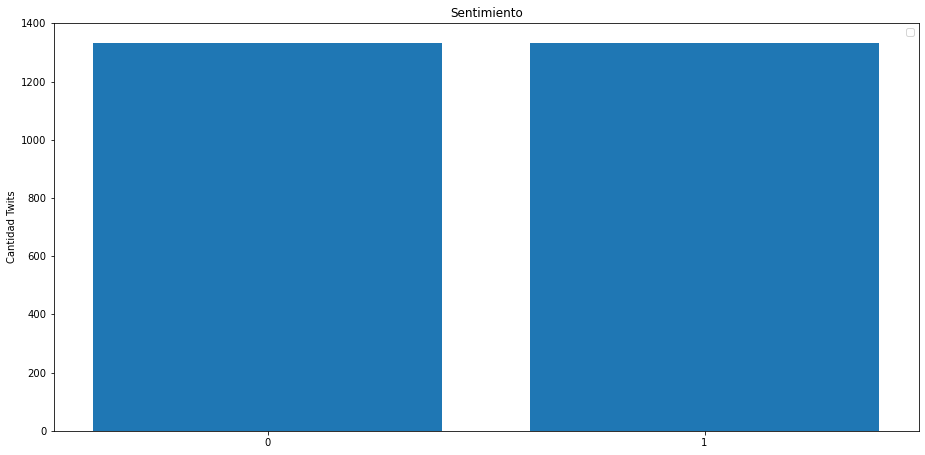

In [237]:
agrupacion_pais =df_upsampled.groupby(['retiro'], as_index = False).count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["retiro"]
men_means =agrupacion_pais["anos_trabajados"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

In [249]:
y_2=df_upsampled['retiro']
X_2=df_upsampled.drop(columns='retiro').copy()

In [252]:
X_2

,F,M,nan,CAS,DIV,ND,SEP,SOL,UNI,VIU,nan,anos_trabajados,anos_ingreso,dif_salario,Tipo area,Total salario_max,Total salario_min
3,1,0,0,0,0,0,0,0,0,0,1,0.0,20.0,877803.0,7,877803.0,0.0
6,1,0,0,0,0,0,0,1,0,0,0,0.0,20.0,0.0,4,877803.0,877803.0
7,0,1,0,0,0,0,0,1,0,0,0,0.0,20.0,0.0,1,877803.0,877803.0
9,0,1,0,0,0,0,0,1,0,0,0,0.0,19.0,0.0,4,438902.0,438902.0
11,0,1,0,0,0,0,0,1,0,0,0,0.0,19.0,438901.0,4,877803.0,438902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,1,0,0,0,1,0,0,0,0,0,3.0,28.0,397200.0,20,1400000.0,1002800.0
672,0,0,1,0,0,0,0,0,0,0,1,0.0,26.0,1900000.0,21,1900000.0,0.0
565,0,1,0,0,0,0,0,1,0,0,0,0.0,22.0,0.0,5,828116.0,828116.0
1770,0,1,0,0,0,0,0,0,1,0,0,0.0,41.0,0.0,5,1051300.0,1051300.0


In [250]:
from sklearn.model_selection import train_test_split
X_train_data_3, X_test_data_3, y_train_data_3, y_test_data_3  = train_test_split(X_2,
                                                             y_2,
                                                            test_size=0.3, 
                                                            random_state=1234
                                                            )

In [255]:
model_rf3 = RandomForestClassifier(n_estimators = 256, min_samples_leaf = 2,
                                  max_features = 8, random_state = 12345)
model_rf3.fit(X_train_data_3, y_train_data_3)
rfc_pred3 = model_rf3.predict(X_test_data_3)

In [256]:
model_rf3.score(X_test_data_3, y_test_data_3)

0.9625468164794008

In [257]:
parametros(model_rf3)

Confusion Matrix : 
 [[394   6]
 [  6 156]]
Accuracy :  0.9786476868327402
Sensitivity :  0.985
Specificity :  0.9629629629629629
